Wir setzen Aufgabe 3 fort, in der ein DecisionTreeClassifier auf dem heart-Datensatz trainiert wurde.

### Teilaufgabe 1

Modifizieren Sie die Funktion aus Aufgabe 3.1, die die Daten in gleich große Trainings-, Validierungs- und Testdatensätze unterteilt, derart, dass die Unterteilung **stratifiziert** erfolgt:

Der Anteil der Patienten mit HeartDisease=1 soll in allen drei Gruppen gleich groß sein.

(Verwenden Sie hierfür keine sklearn-Funktionalität.)


In [81]:
import pandas as pd
import numpy as np
df_heart = pd.read_csv("./datasets/heart.csv")

X = df_heart.iloc[:, :-1].copy()
y = df_heart.iloc[:, -1].copy()
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


In [83]:
X_numcols = X.select_dtypes(include=np.number).columns.tolist()
X_numcols

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [84]:
X_catcols = X.select_dtypes(exclude=np.number).columns.tolist()
X_catcols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [85]:
df_heart.loc[:,X_catcols]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [86]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder( handle_unknown="ignore", sparse_output=False, drop="if_binary" )

# handle_unknown="ignore" => any unknown category will be mapped to "all zeros"
# drop="if_binary"        => Sex is a binary variable (it contains only "M" and "F"), so it is sufficient
#                            to store if Sex_M is 0 or 1. More generally, if there are n categories,
#                            it is sufficient to create n-1 columns.
#                            Note however that this collides with handle_unknown="ignore".
#                            Namely, if a third value is encountered during testing (e.g. "unknown" for Sex),
#                            it will be mapped to 0 (because of handle_unknown="ignore")
#                            which will be interpreted as "Sex=F" (because of drop="if_binary").
#                            The drop-parameter is used here for demonstration only.

X_cat = pd.DataFrame (
	enc.fit_transform ( df_heart.loc[:,X_catcols] ),
	columns=enc.get_feature_names_out(),
	index=df_heart.index
)

X_cat

,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
914,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
915,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
916,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
X_cat = X_cat.astype("int")
X = pd.concat([X_cat, X.loc[:,X_numcols]], axis=1)
X

,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,0,1,0,0,0,1,0,0,0,0,1,40,140,289,0,172,0.0
1,0,0,0,1,0,0,1,0,0,0,1,0,49,160,180,0,156,1.0
2,1,0,1,0,0,0,0,1,0,0,0,1,37,130,283,0,98,0.0
3,0,1,0,0,0,0,1,0,1,0,1,0,48,138,214,0,108,1.5
4,1,0,0,1,0,0,1,0,0,0,0,1,54,150,195,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,0,1,0,1,0,0,0,1,0,45,110,264,0,132,1.2
914,1,1,0,0,0,0,1,0,0,0,1,0,68,144,193,1,141,3.4
915,1,1,0,0,0,0,1,0,1,0,1,0,57,130,131,0,115,1.2
916,0,0,1,0,0,1,0,0,0,0,1,0,57,130,236,0,174,0.0


In [88]:


from sklearn.model_selection import train_test_split


y = df_heart.iloc[:,-1].copy().astype("int")

X_train, X_rest, y_train, y_rest = train_test_split(X,y, train_size=1/3, random_state=42, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_rest, y_rest, train_size=0.5, random_state=42, stratify=y_rest)

# if stratify worked, the mean of y_train, y_validation and y_test should all be the same
y_train.mean(), y_validation.mean(), y_test.mean()

(np.float64(0.5522875816993464),
 np.float64(0.5555555555555556),
 np.float64(0.5522875816993464))

### Teilaufgabe 2

Erstellen Sie einen DecisionTreeClassifier auf den neu erstellten Trainingsdaten und variieren Sie `max_depth` und `min_samples_leaf` jeweils im Bereich {1,2,...,10}.

In [89]:
from sklearn import tree
from sklearn.metrics import accuracy_score


results = []
for max_depth in range(1,11):
	for min_samples_leaf in range(1,11):
		# fit tree
		clf = tree.DecisionTreeClassifier ( max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42 )
		clf.fit ( X_train, y_train )

		# predict on train and validation set
		pred_train = clf.predict(X_train)
		pred_validation   = clf.predict(X_validation)

		results.append({
			"max_depth": max_depth,
			"min_samples_leaf": min_samples_leaf,
			"pred_train": pred_train,
			"pred_validation": pred_validation,
		})
results

[{'max_depth': 1,
  'min_samples_leaf': 1,
  'pred_train': array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
         1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
         1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
         0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
         0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
         0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
         0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
         1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
         1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1

### Teilaufgabe 3

Berechnen Sie die Einträge der Konfusionsmatrix sowie die Accuracy-Werte auf Trainings- und Validierungsdaten und stellen diese in einem pandas Dataframe dar.

In [92]:

def get_metrics(pred_validation, pred_train, y_validation, y_train):
	TP_validation = np.sum((pred_validation == 1) & (y_validation == 1))
	FP_validation = np.sum((pred_validation == 1) & (y_validation == 0))
	TN_validation = np.sum((pred_validation == 0) & (y_validation == 0))
	FN_validation = np.sum((pred_validation == 0) & (y_validation == 1))

	TP_train = np.sum((pred_train == 1) & (y_train == 1))
	FP_train = np.sum((pred_train == 1) & (y_train == 0))
	TN_train = np.sum((pred_train == 0) & (y_train == 0))
	FN_train = np.sum((pred_train == 0) & (y_train == 1))

	accuracy_validation = accuracy_score(y_validation, pred_validation)
	accuracy_train = accuracy_score(y_train, pred_train)
	return {
		"accuracy_validation":accuracy_validation,
		"TP_validation":TP_validation,
		"FP_validation":FP_validation,
		"TN_validation":TN_validation,
		"FN_validation":FN_validation,
		"accuracy_train":accuracy_train,
		"TP_train":TP_train,
		"FP_train":FP_train,
		"TN_train":TN_train,
		"FN_train":FN_train,
	}

metrics_summary = [{
	"max_depth": result["max_depth"],
	"min_samples_leaf": result["min_samples_leaf"],
	**get_metrics(pred_validation=result["pred_validation"], pred_train=result["pred_train"],y_validation=y_validation, y_train=y_train),
} for result in results]
df_metrics = pd.DataFrame(metrics_summary)
df_metrics

,max_depth,min_samples_leaf,accuracy_validation,TP_validation,FP_validation,TN_validation,FN_validation,accuracy_train,TP_train,FP_train,TN_train,FN_train
0,1,1,0.833333,146,27,109,24,0.830065,147,30,107,22
1,1,2,0.833333,146,27,109,24,0.830065,147,30,107,22
2,1,3,0.833333,146,27,109,24,0.830065,147,30,107,22
3,1,4,0.833333,146,27,109,24,0.830065,147,30,107,22
4,1,5,0.833333,146,27,109,24,0.830065,147,30,107,22
...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,6,0.813725,131,18,118,39,0.908497,154,13,124,15
96,10,7,0.813725,131,18,118,39,0.908497,154,13,124,15
97,10,8,0.836601,141,21,115,29,0.892157,153,17,120,16
98,10,9,0.823529,146,30,106,24,0.885621,156,22,115,13


### Teilaufgabe 4

Visualisieren Sie die Trainings- und Validierungsaccuracy in einer geeigneten (zweidimensionalen) Darstellung.

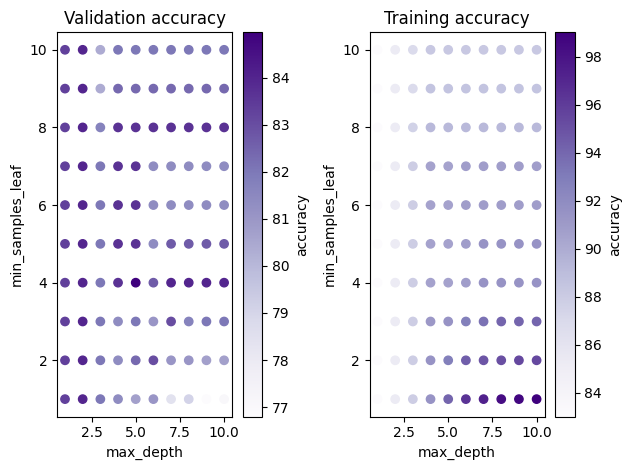

In [114]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)


axes[0].scatter(df_metrics["max_depth"], df_metrics["min_samples_leaf"], c=df_metrics["accuracy_validation"]*100, cmap="Purples")
axes[0].set_xlabel("max_depth")
axes[0].set_ylabel("min_samples_leaf")
axes[0].set_title("Validation accuracy")
fig.colorbar(axes[0].collections[0], ax=axes[0], label="accuracy")

axes[1].scatter(df_metrics["max_depth"], df_metrics["min_samples_leaf"], c=df_metrics["accuracy_train"]*100, cmap="Purples")
axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("min_samples_leaf")
axes[1].set_title("Training accuracy")
fig.colorbar(axes[1].collections[0], ax=axes[1], label="accuracy")

fig.tight_layout()

### Teilaufgabe 5

Vergleichen Sie Ihre 2D- mit der nachfolgenden 3D-Visualisierung. Welche Vor- und Nachteile haben die jeweiligen Darstellungen? 

Beschreiben und Interpretieren Sie die Abhängigkeit der Accuracy von den zwei Parametern `max_depth` und `min_sample_leafs`.

![3d graphic, comparing different hyperparameters](./aufgabe05_3d.png)

Hinweis zu Teilaufgabe 3: Wenn zwei Parameter zur Spaltenindizierung verwendet werden sollen (wie hier die Hyperparameter max_depth, min_sample_leafs), sind sog. Multiindices eine elegante Lösung (aber nicht notwendig zur Bearbeitung der Aufgabe).

Für eine explizite Konstruktion des Multiindex verwenden Sie pd.MultiIndex.from_tuples; implizit können Sie ein DataFrame mit Multiindices initialisieren, wenn Sie Tuples als Dictionary-Keys verwenden und das Dictionary im DataFrame-Konstruktor übergeben. 


1. Hohe `max_depth` und geringe `min_sample_leafs` führen zu einer hohen accuracy auf dem Trainingsdatensatz.
2. Mittlere `max_depth` und hohe `min_sample_leafs` führen zu einer hohen accuracy auf dem Validierungsdatensatz.

Verwendet man also die erste Konstellation ist die accuracy zwar für den Trainingsdatensatz hoch, aber für den Validierungsdatensatz gering.
Sprich, diese Konstellation führt zu Overfitting.

Für die 2. Konstellation performed der Decision Tree auf den Trainingsdatensatz nicht mehr so gut, ist jetzt jedoch auf dem Validierungsdatensatz besser.

Ist es von Wichtigkeit, dass das trainierte Modell generalisieren kann, sollte die zweite Konstellation gewählt werden.

